# **Curso de Inteligencia Artificial**
---
<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://github.com/AntonioEscamilla/images-in-readMe/raw/master/Curso%20IA/upb%20logo.jpg", align="left", width="350">
</div>

### **Facultad en Tecnologías de la Información y la Comunicación**

### Escuela de Ingenierías

### Universidad Pontificia Bolivariana

---

## **Docente: Ph.D. Antonio Escamilla**

# **Regresión usando Árboles y Knn**

En este cuaderno, se cubriran los siguientes temas:

### 1. Preparación de Datos
### 2. Árboles de Decisión
### 3. K-nearest Neighbors

In [ ]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 32.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Descargando Assets a Colab")
!wget --quiet --show-progress --output-document=videojuegos.csv https://drive.google.com/uc?id=1I3iv8BXi9n5ziLOWUDYlzzEHWHvpBnRf&export=download

Descargando Assets a Colab
videojuegos.csv     100%[===================>]   6.67K  --.-KB/s    in 0s      


# 1. Preparación de Datos

In [ ]:
#Cargar los datos

data = pd.read_csv('videojuegos.csv')
data.head()

,videojuego,Edad,Sexo,Plataforma,Consumidor_habitual,Presupuesto para invertir
0,'Mass Effect',29,Mujer,PC,True,200
1,'Sim City',27,Mujer,Otros,True,600
2,'Dead Space',22,Hombre,'Xbox',False,200
3,'Battlefield',28,Mujer,'Xbox',True,370
4,'KOA: Reckoning',30,Mujer,PC,True,100


In [ ]:
# Validar tipos de variables y existencia de nulos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   videojuego                 168 non-null    object
 1   Edad                       168 non-null    int64 
 2   Sexo                       168 non-null    object
 3   Plataforma                 168 non-null    object
 4   Consumidor_habitual        168 non-null    bool  
 5   Presupuesto para invertir  168 non-null    int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 6.9+ KB


In [ ]:
# Corrección del tipo de datos

data['videojuego'] = data['videojuego'].astype('category')
data['Sexo'] = data['Sexo'].astype('category')
data['Plataforma'] = data['Plataforma'].astype('category')

In [ ]:
#Descripción de variables numéricas

data.describe()

,Edad,Presupuesto para invertir
count,168.000000,168.000000
mean,27.500000,310.595238
std,9.744644,295.434730
min,14.000000,0.000000
25%,19.000000,100.000000
50%,26.000000,215.000000
75%,33.000000,400.000000
max,52.000000,1200.000000


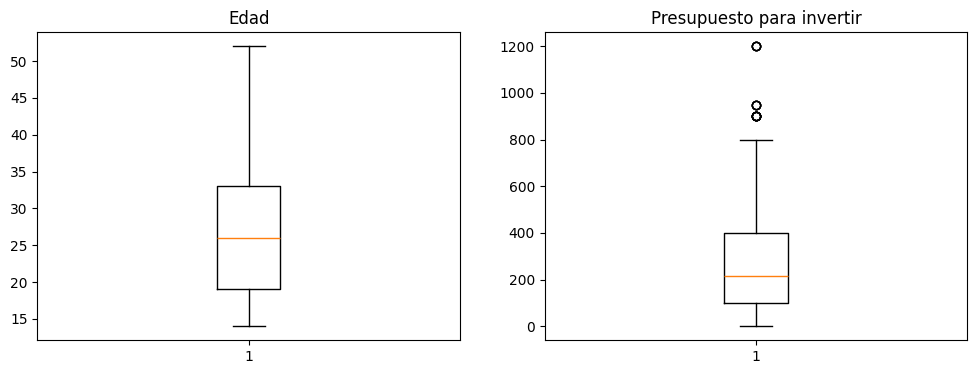

In [ ]:
# Graficar box-plots para variables númericas

columnas_num = ['Edad', 'Presupuesto para invertir']  # Lista con los nombres de las columnas a graficar

fig, axes = plt.subplots(1, len(columnas_num), figsize=(12, 4))

for i, column in enumerate(columnas_num):
    axes[i].boxplot(data[column])
    axes[i].set_title(column)

plt.show()

<Axes: xlabel='videojuego'>

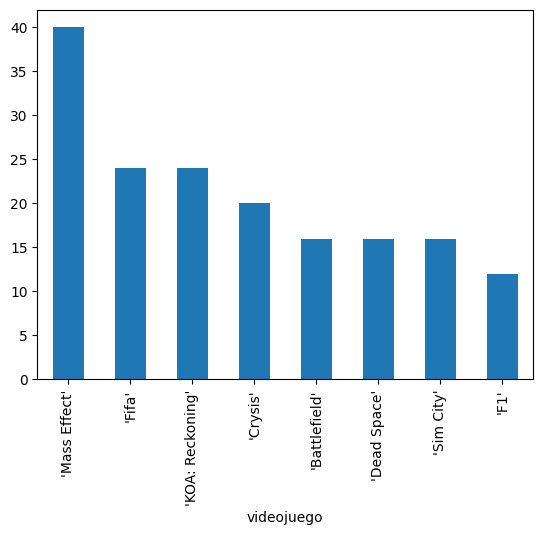

In [ ]:
# Descripción gráfica de variables categóricas
# Variables de multiples categorias mejor con 'bar'

data['videojuego'].value_counts().plot(kind='bar')

<Axes: xlabel='Plataforma'>

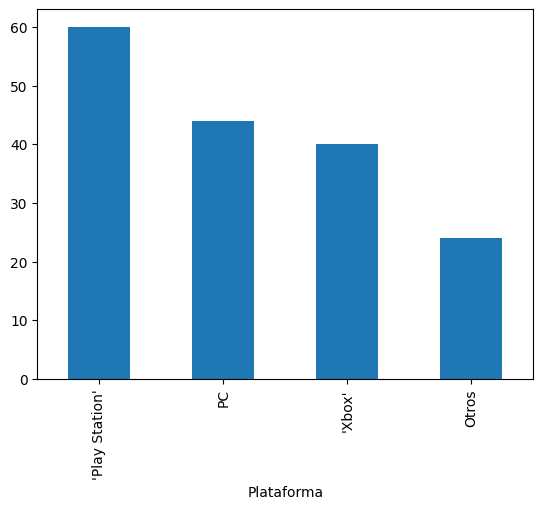

In [ ]:
data['Plataforma'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

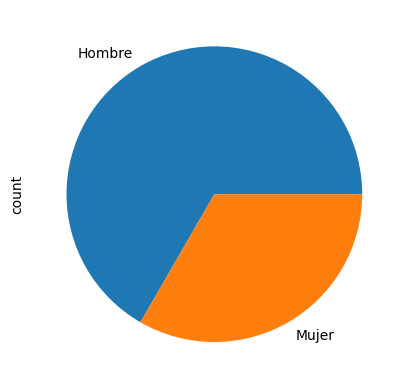

In [ ]:
# Descripción gráfica de variables categóricas
# Variables categoricas binarias mejor con 'pie'
data['Sexo'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

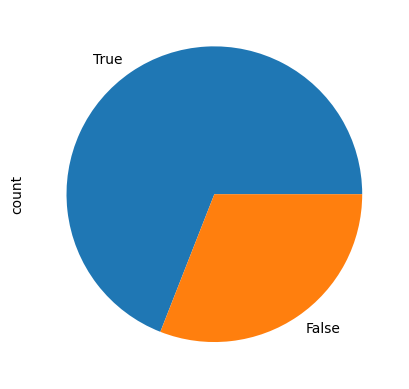

In [ ]:
data['Consumidor_habitual'].value_counts().plot(kind='pie')

In [ ]:
# Crear variables dummy para convertir las categorías a números
# Cuales columnas transformar con 'drop_first'=False y cuales con 'drop_first'=True

data = pd.get_dummies(data, columns=['Sexo', 'Consumidor_habitual'],drop_first=True, dtype=int)
data = pd.get_dummies(data, columns=['videojuego', 'Plataforma'],drop_first=False, dtype=int)
data.head()

,Edad,Presupuesto para invertir,Sexo_Mujer,Consumidor_habitual_True,videojuego_'Battlefield',videojuego_'Crysis',videojuego_'Dead Space',videojuego_'F1',videojuego_'Fifa',videojuego_'KOA: Reckoning',videojuego_'Mass Effect',videojuego_'Sim City',Plataforma_'Play Station',Plataforma_'Xbox',Plataforma_Otros,Plataforma_PC
0,29,200,1,1,0,0,0,0,0,0,1,0,0,0,0,1
1,27,600,1,1,0,0,0,0,0,0,0,1,0,0,1,0
2,22,200,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,28,370,1,1,1,0,0,0,0,0,0,0,0,1,0,0
4,30,100,1,1,0,0,0,0,0,1,0,0,0,0,0,1


# 2. Divisón del dataset en conjuntos de Entrenamiento y Prueba


**¿Por qué no se usa la estratificación en regresión tan a menudo como en clasificación?**

En la regresión, la variable objetivo es un valor continuo, lo que significa que hay una gran cantidad de posibles valores que la variable objetivo puede tomar. Esto contrasta con la clasificación, donde la variable objetivo solo puede tomar un número limitado de valores discretos.

Debido a la naturaleza continua de la variable objetivo en la regresión, la estratificación no es tan importante como en la clasificación. La estratificación en la clasificación se utiliza para dividir el conjunto de datos en subconjuntos con distribuciones similares de la variable objetivo. Esto es importante porque ayuda a asegurar que el modelo no se sesgue hacia ninguna clase en particular.

In [ ]:
from sklearn.model_selection import train_test_split

# Crear subconjunto con variables dependientes (Atributos)
X = data.drop("Presupuesto para invertir", axis=1)

# Crear subconjunto con variable independiente (Objetivo)
y = data['Presupuesto para invertir']

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

# 3. Aprendizaje del Modelo usando solo datos de Entrenamiento

### 3.1 Arboles de Decisión para una Regresión
En los árboles de regresión, el objetivo es minimizar el error entre las predicciones del modelo y los valores reales de la variable objetivo. El error se calcula como la suma de los cuadrados de las diferencias entre las predicciones y los valores reales.

El squared error (error cuadrático medio) es una medida común del error en regresión. Se utiliza porque es una medida simple y fácil de calcular. Además, el squared error es una función convexa, lo que significa que es fácil encontrar el mínimo de la función.

Al utilizar el squared error como criterion al instanciar un árbol de regresión, se le indica al modelo que minimice el error cuadrático medio entre sus predicciones y los valores reales de la variable objetivo. Esto ayuda a asegurar que el modelo genere predicciones precisas.

In [ ]:
from sklearn import tree
# Creación del modelo con el conjunto de entrenamiento
# inicialmente usar: min_samples_leaf=4, max_depth=6 y criterion=??

model_tree = tree.DecisionTreeRegressor(min_samples_leaf=4, max_depth=6, criterion='squared_error')
model_tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


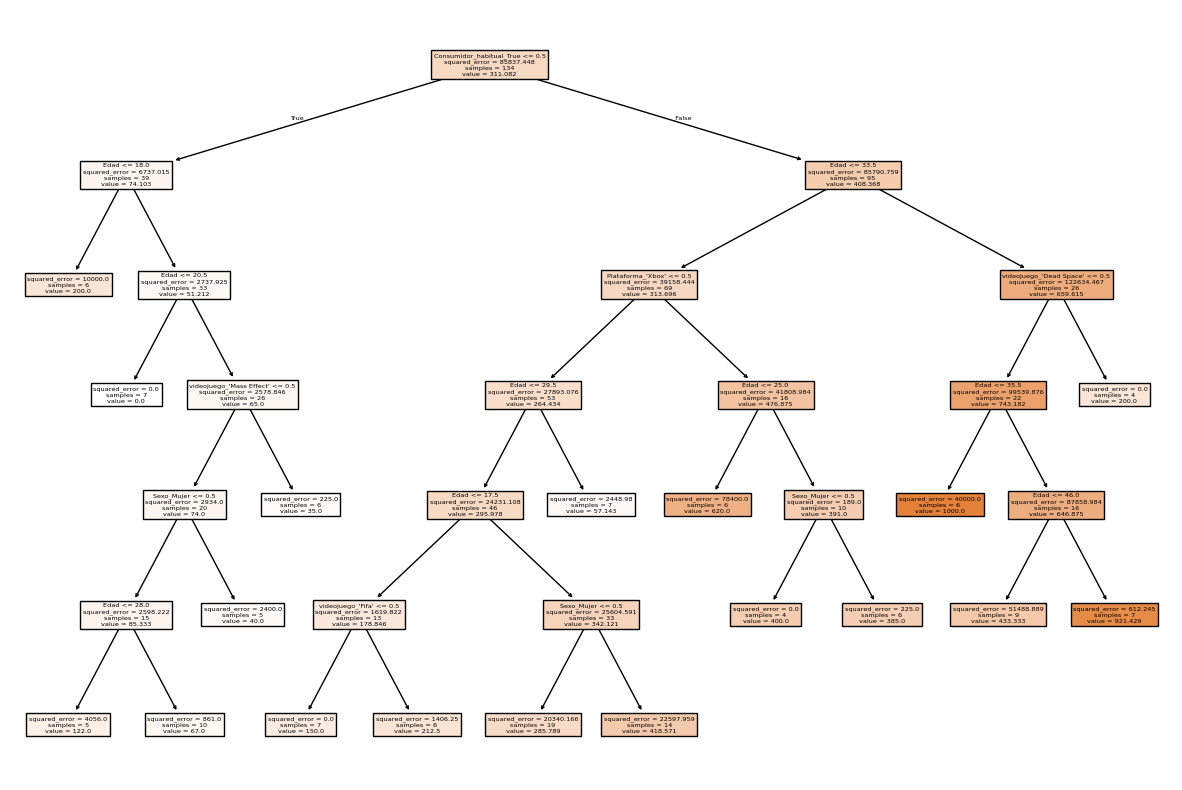

In [ ]:
# Graficar el árbol
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(model_tree, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

In [ ]:
model_tree.feature_importances_

array([0.49298712, 0.01584087, 0.3254647 , 0.        , 0.        ,
       0.10520496, 0.        , 0.00132954, 0.        , 0.00073956,
       0.        , 0.        , 0.05843325, 0.        , 0.        ])


### 3.2 Knn para un problema de Regresión

**Diferencias entre KNN para Clasificación y Regresión**

En la clasificación KNN:
* Se busca la clase más común entre los K vecinos más cercanos a un punto nuevo.
* La distancia entre puntos es crucial para la clasificación.
* El resultado final es una categoría discreta.

En la regresión KNN:
* Se calcula el promedio (o la mediana) de los valores de la variable objetivo de los K vecinos más cercanos a un punto nuevo.
* La distancia entre puntos sigue siendo importante para la predicción.
* El resultado final es un valor continuo para la variable objetivo.

En resumen:
* Objetivo: Clasificación vs. Predicción de valores continuos.
* Función de salida: Categoría discreta vs. Valor continuo.
* Cálculo: Mayoría de votos vs. Promedio/Mediana.

Otras diferencias:
* En regresión KNN, a veces se ponderan los votos de los vecinos según su distancia al punto nuevo.
* La elección de K puede ser más crucial en regresión KNN que en clasificación.
* KNN es generalmente más sensible al ruido en regresión que en clasificación.

In [ ]:
from sklearn import neighbors
# Creación del modelo con el conjunto de entrenamiento
# inicialmente usar pocos vecinos

model_knn = neighbors.KNeighborsRegressor(n_neighbors=7, metric='euclidean')
model_knn.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


# 4. Evaluación del modelo sobre el conjunto de Prueba

### 4.1 Gráfica scatter con y_test vs y_pred

**Una gráfica scatter con `y_test` vs `y_pred` puede ser útil para entender un modelo de regresión:**

**Ventajas de usar una gráfica scatter:**

* **Visualización de la relación entre las variables:** La gráfica scatter te permite ver cómo se relacionan las variables `y_test` (valor real) y `y_pred` (valor predicho) por el modelo.
* **Identificación de errores:** Puedes identificar fácilmente los puntos que se alejan mucho de la línea de regresión, lo que indica que el modelo no ha predicho correctamente el valor de `y` para esos ejemplos.
* **Evaluación del rendimiento del modelo:** La gráfica scatter te permite visualizar la precisión del modelo al observar la dispersión de los puntos alrededor de la línea de regresión.

**Limitaciones de usar una gráfica scatter:**

* **No muestra la distribución de los errores:** La gráfica scatter solo muestra la relación entre las variables, no la distribución de los errores.
* **No es útil para modelos con muchos predictores:** Si el modelo tiene muchos predictores, la gráfica scatter puede ser difícil de interpretar.
* **No es la única herramienta para evaluar el rendimiento del modelo:** Existen otras métricas, como el error cuadrático medio (MSE) o el coeficiente de determinación (R^2), que pueden proporcionar información más precisa sobre el rendimiento del modelo.


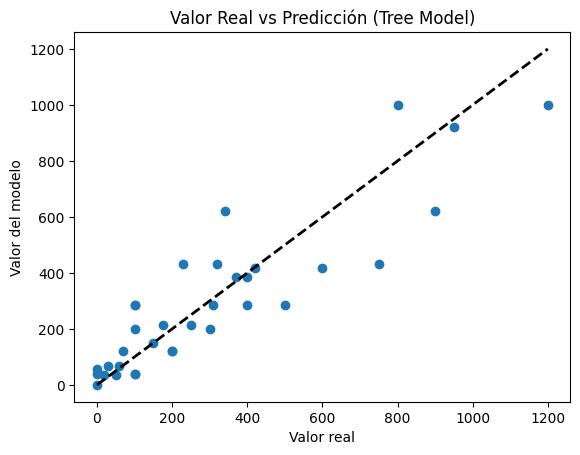

In [ ]:
#Gráfica Valor Real vs Predicción
# y_pred_tree = asignar predicciones del Tree model
y_pred_tree = model_tree.predict(X_test)
plt.scatter(y_test, y_pred_tree)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción (Tree Model)')
plt.show()

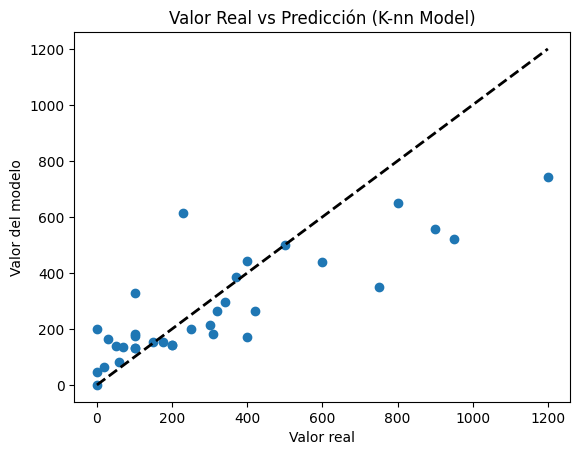

In [ ]:
#Gráfica Valor Real vs Predicción
# y_pred_knn = asignar predicciones del Knn model
y_pred_knn = model_knn.predict(X_test)
plt.scatter(y_test, y_pred_knn)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción (K-nn Model)')
plt.show()

### 4.2 Métricas RMSE y MAE para comparar ambos modelos

In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

rmse = root_mean_squared_error(y_test, y_pred_tree)
mae = mean_absolute_error(y_test, y_pred_tree)

print('Metricas para el Arbol: \n')
print(f'RMSE: {rmse}')
print(f'mean abs error: {mae}')

Metricas para el Arbol: 

RMSE: 133.46303379154705
mean abs error: 98.0328025947221


In [ ]:
#Evaluación sobre el conjunto de prueba

rmse = root_mean_squared_error(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)

print('Metricas para K-nn: \n')
print(f'RMSE: {rmse}')
print(f'mean abs error: {mae}')

Metricas para K-nn: 

RMSE: 181.85708344609458
mean abs error: 127.22689075630248


# 5. Guardamos el modelo para Despliegue

**Pickle** es una biblioteca estándar de Python que te permite serializar objetos en Python, lo que significa que puedes convertirlos en un formato binario que se puede almacenar y cargar en el futuro. Esto es útil para guardar un estimador entrenado para que puedas usarlo más tarde sin tener que volver a entrenarlo.

In [ ]:
import pickle
filename = 'modelo.pkl'

data_struct = {
    "tree_model": model_tree,
    "knn_model": model_knn,
    "pred_variables": X.columns._values
}

with open(filename, 'wb') as f:
    pickle.dump(data_struct, f)

In [ ]:
from google.colab import files

# Replace with the name of your file
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>